<div style='background-color:#4e9bf8; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'>Heart Failure Risk Analysis – Data Analytics Project</h1>
</div>

<h2 style='color:#4e9bf8;'>Objectives</h2>

- Develop data visualizations to support insights.
- Create linear regression to predict future heart failure.



<h2 style='color:#4e9bf8;'>Inputs</h2>

- **Dataset:** `cleaned_heartdataset.csv`
- **Required Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly, XGBoost, Scipy
- **Columns of Interest:**
  - **Demographics:** Age, Sex
  - **Medical Indicators:** ChestPainType, RestingBP, FastingBS, Cholesterol, RestingECG, MaxHR, ExerciseAngina

<h2 style='color:#4e9bf8;'>Outputs</h2>

- **Dataset:** `predicted_risk_heart.csv`


---

<div style='background-color:#4e9bf8; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'>Section 3 :  Heart Failure Predictive Modelling</h1>
</div>

<h2 style='color:#4e9bf8;'>Changing work directory</h2>

To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

's:\\Documents\\Code Institute\\vscode-projects\\Heart-Failure-Capstone\\Heart-Failure-Risk-Analysis\\jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:
  * os.path.dirname() to get the parent directory
  * os.chir() to define the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


Confirming the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

's:\\Documents\\Code Institute\\vscode-projects\\Heart-Failure-Capstone\\Heart-Failure-Risk-Analysis'

<h2 style='color:#4e9bf8;'>Importing Libraries and Packages</h2>

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations and Scikit-learn for predictive modelling
 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.graph_objects import Figure, Scatter
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")

Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [5]:
df = pd.read_csv("Outputs\\cleaned_heartdataset.csv")

<h2 style='color:#4e9bf8;'>Predicting Heart Failure</h2>

We are going to preview the dateframe first to check correct dataset has been imported in dataframe

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,AgeGroup,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,...,40-49,True,True,False,False,True,False,False,False,True
1,49.0,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,...,40-49,False,False,True,False,True,False,False,True,False
2,37.0,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,...,30-39,True,True,False,False,False,True,False,False,True
3,48.0,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,...,40-49,False,False,False,False,True,False,True,True,False
4,54.0,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,...,50-59,True,False,True,False,True,False,False,False,True


Now we are going to use different models like logistic regression model, decision tree, random forest and XGBoost to predict the target variable (Risk score) for Heart Failure and will select the predictive model with the highest recall results. As the data is impbalanced (79% males and only 21% females recorded in dataset) accuracy of models might be misleading so we are going to use recall scores to see proportion of correctly predicted positive cases out of all actual positive cases. The predictive model with the best recall score will be used to calculate the Risk Score and added into a seperate column into the dataframe for dashboard

Creating logistics regression model to predict risk score for heart failure

In [7]:
# Defining the features and target variable
X = df[['Age', 'MaxHR', 'Oldpeak', 'FastingBS', 'ChestPainType_TA', 'Cholesterol']]  # Important features
y = df['HeartDisease']  # Target variable (1 = Heart Disease, 0 = No Heart Disease)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=2000)
model.fit(X_train, y_train)

# Predicting probabilities for test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Heart Disease)

Converting the probabilities (RiskScore) into predicted class labels using a threshold (e.g., 0.5), we can gain individualized insights (via RiskScore: e.g., prioritize individuals with high scores for intervention) and overall model evaluation (via confusion matrix)

In [8]:
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred_proba]  # Apply threshold
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report for accuracy, precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"\nAccuracy: {accuracy:.2f}")


Confusion Matrix:
[[59 23]
 [21 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        82
           1       0.78      0.79      0.79       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184


Accuracy: 0.76


Plotting a confusion matrix for logistic  predictive modeling will provide a clear, concise way to evaluate the model's performance, also plotting the Receiver Operating Characteristic (ROC) curve to visualise classification of logistic model's ability to distinguish between classes. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels

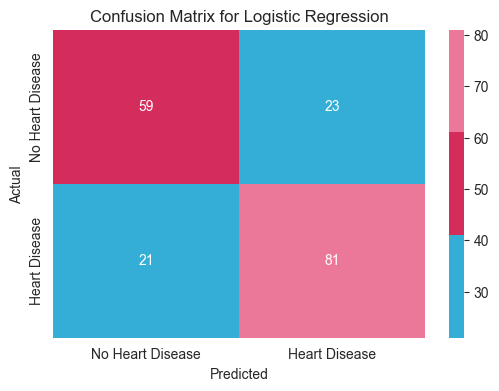

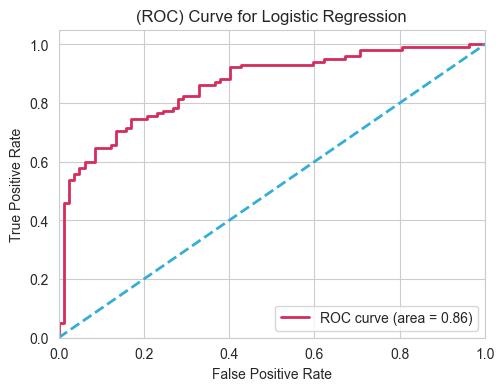

In [9]:
# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=['#35AED7', '#D42D5C', '#EB7898'], xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Calculate predicted probabilities and plot the ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(5.5, 4))
plt.plot(fpr, tpr, color='#D42D5C', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='#35AED7', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Creating Random Forest Classifier Model to predict risk score for heart failure

In [10]:
print("\nRandom Forest Classifier Model")
# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_rf:.2f}")

# ROC Curve and AUC for Random Forest
# Compute ROC-AUC score
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nAUC Score: {auc_rf:.2f}")


Random Forest Classifier Model

Confusion Matrix:
[[60 22]
 [22 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        82
           1       0.78      0.78      0.78       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184

Accuracy: 0.76

AUC Score: 0.82


Plotting the confusion matrix for the Random Forest model

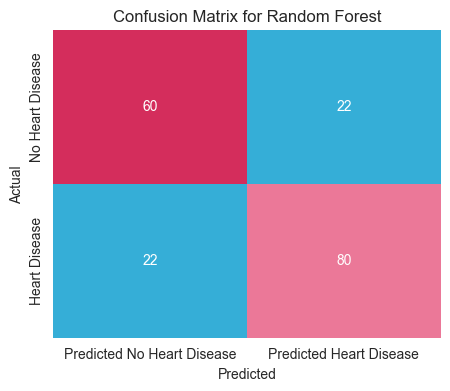

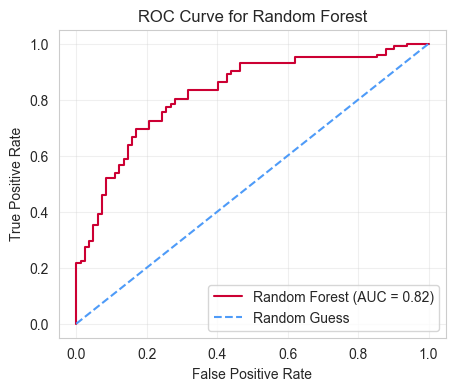

In [11]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=['No Heart Disease', 'Heart Disease'], columns=['Predicted No Heart Disease', 'Predicted Heart Disease'])

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf_df, annot=True, fmt='d', cmap=['#35AED7', '#D42D5C', '#EB7898'], cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='#CC0033')
plt.plot([0, 1], [0, 1], linestyle='--', color='#4e9bf8', label='Random Guess')
plt.title("ROC Curve for Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Creating a decision tree model to predict risk score for heart failure

In [12]:
print("\nDecision Tree Classifier Model")
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth or other hyperparameters as needed

# Training the  decision tree model
tree_model.fit(X_train, y_train)

# Predicting based on the test set
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

#Evaluating the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")


Decision Tree Classifier Model

Confusion Matrix:
[[58 24]
 [21 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        82
           1       0.77      0.79      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.76      0.75       184

Accuracy: 0.76


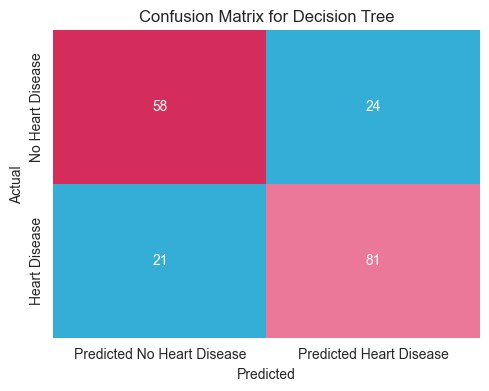

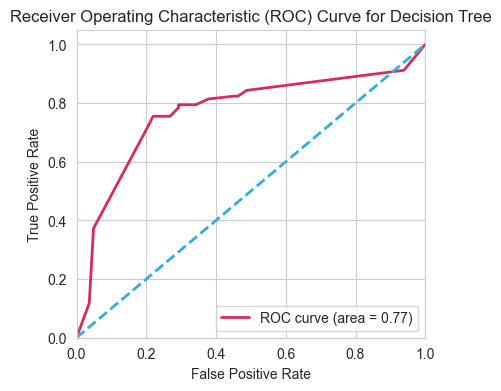

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Calculate the confusion matrix for the decision tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plotting the confusion matrix for the decision tree
conf_matrix_tree_df = pd.DataFrame(conf_matrix_tree, index=['No Heart Disease', 'Heart Disease'], columns=['Predicted No Heart Disease', 'Predicted Heart Disease'])

plt.figure(figsize=(5.5, 4))
sns.heatmap(conf_matrix_tree_df, annot=True, fmt='d', cmap=['#35AED7', '#D42D5C', '#EB7898'], cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plotting the ROC curve for the decision tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

plt.figure(figsize=(4.5, 4))
plt.plot(fpr_tree, tpr_tree, color='#D42D5C', lw=2, label=f'ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='#35AED7', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

Creating a XGBoost model to predict Risk score for heart failure

In [14]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_xgb:.2f}")

# ROC Curve and AUC for XGBoost
# Compute ROC-AUC score
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"\nAUC Score: {auc_xgb:.2f}")


Confusion Matrix:
[[59 23]
 [24 78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        82
           1       0.77      0.76      0.77       102

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.74      0.74      0.74       184

Accuracy: 0.74

AUC Score: 0.81


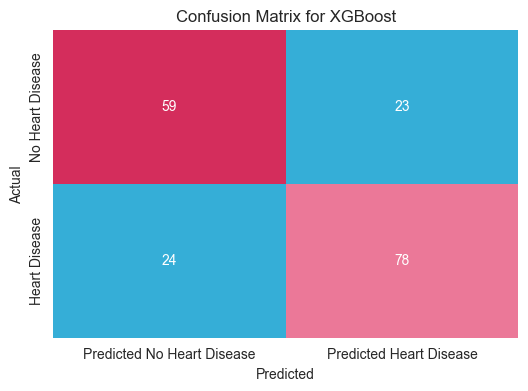

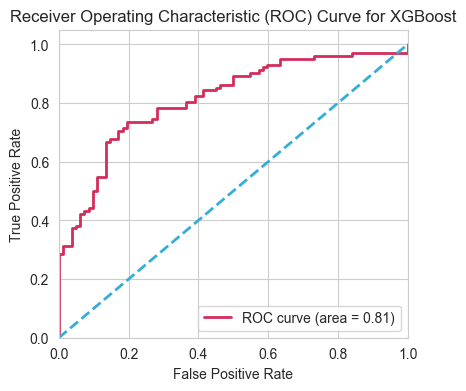

In [15]:
# Calculate the confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotting the confusion matrix for XGBoost
conf_matrix_xgb_df = pd.DataFrame(conf_matrix_xgb, index=['No Heart Disease', 'Heart Disease'], columns=['Predicted No Heart Disease', 'Predicted Heart Disease'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb_df, annot=True, fmt='d', cmap=['#35AED7', '#D42D5C', '#EB7898'], cbar=False)
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plotting the ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.figure(figsize=(4.5, 4))
plt.plot(fpr_xgb, tpr_xgb, color='#D42D5C', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='#35AED7', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

Next we are going to carry out a cross-validation to ensure that the predictive models generalize well to unseen data, reduce overfitting, provide 
reliable performance estimate, and help with model comparison

In [16]:
from sklearn.metrics import recall_score

# Define the features and target variable
X = df[['Age', 'MaxHR', 'Oldpeak', 'FastingBS', 'ChestPainType_TA', 'Cholesterol']]
y = df['HeartDisease']

# Initialize the models
logistic_model = LogisticRegression(random_state=42, max_iter=2000)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')  # Removed use_label_encoder

# Perform cross-validation for each model
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Fit models to get recall scores
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

logistic_recall = recall_score(y_test, logistic_model.predict(X_test))
tree_recall = recall_score(y_test, tree_model.predict(X_test))
rf_recall = recall_score(y_test, rf_model.predict(X_test))
xgb_recall = recall_score(y_test, xgb_model.predict(X_test))

# Create a DataFrame to display the results
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross-validation Scores': [logistic_cv_scores, tree_cv_scores, rf_cv_scores, xgb_cv_scores],
    'Mean Accuracy Score': [logistic_cv_scores.mean(), tree_cv_scores.mean(), rf_cv_scores.mean(), xgb_cv_scores.mean()],
    'Recall Score': [logistic_recall, tree_recall, rf_recall, xgb_recall]
})
cv_results['Cross-validation Scores'] = cv_results['Cross-validation Scores'].apply(lambda scores: [score * 100 for score in scores])
cv_results['Mean Cross-validation Score'] = cv_results['Cross-validation Scores'].apply(lambda scores: np.round(np.mean(scores), 1))
cv_results['Mean Accuracy Score'] = np.round(cv_results['Mean Accuracy Score'] * 100, 1)
cv_results['Recall Score'] = np.round(cv_results['Recall Score'] * 100, 1)
cv_results


,Model,Cross-validation Scores,Mean Accuracy Score,Recall Score,Mean Cross-validation Score
0,Logistic Regression,"[71.73913043478261, 74.45652173913044, 73.9130...",73.9,79.4,73.9
1,Decision Tree,"[75.0, 70.1086956521739, 72.82608695652173, 74...",72.5,79.4,72.5
2,Random Forest,"[72.82608695652173, 76.08695652173914, 71.7391...",72.4,78.4,72.4
3,XGBoost,"[68.47826086956522, 73.91304347826086, 70.6521...",69.4,76.5,69.4


After checking the predicting models accuracy, cross validation and recall score. Logistic regression has the best predicting Recall, proportion of correctly predicted positive cases out of all actual positive cases thus we are going to use logistic regression to predict the Risk score for Heart failure and add in the dataframe as two new columns: one telling percentage of Risk score and second flagging the Risk scores as low, normal, medium and high

In [17]:
# Adding predicted risk to the original DataFrame
X_test['RiskScore'] = np.round(y_pred_proba * 100,1)  # Convert to percentage scale

# Define a function to categorize risk scores
def categorize_risk(score):
    if score < 20:
        return 'Low'
    elif 20 <= score < 40:
        return 'Normal'
    elif 40 <= score < 60:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column for risk categories
X_test['RiskCategory'] = X_test['RiskScore'].apply(categorize_risk)

# Display the updated DataFrame with the new columns
X_test[['Age', 'MaxHR', 'Oldpeak', 'FastingBS', 'RiskScore', 'RiskCategory']]

,Age,MaxHR,Oldpeak,FastingBS,RiskScore,RiskCategory
356,46.0,113.0,1.5,0,80.4,High
763,58.0,173.0,3.2,0,70.2,High
817,60.0,141.0,2.8,0,84.5,High
735,49.0,139.0,2.0,0,70.5,High
892,39.0,152.0,0.0,0,22.3,Normal
...,...,...,...,...,...,...
52,45.0,122.0,0.0,1,74.6,High
752,56.0,144.0,1.2,1,81.0,High
492,49.0,145.0,3.0,0,77.8,High
622,59.0,142.0,1.2,0,55.7,Medium


We are going to output the dataframe with the new columns into a new csv for dashboard

In [18]:
df.to_csv("Outputs\\predicted_risk_heart.csv", index=False)

<div style='background-color:#4e9bf8; padding: 15px; border-radius: 5px;'>
<h2 style='color:#FEFEFE; text-align:center;'>Conclusion & Next Step</h2>
</div>

In this section, we did predictive modeling, calculating the most accurate model to determine heart failure risk scores and flag those individuals

After checking the predicting models confusion matrix and plotting ROC curves, carried out a cross-validation, comparing different accuracies, recall and cross-validation scores.

Logistic regression had the best predicting Recall i.e. proportion of correctly predicted positive cases out of all actual positive cases thus we are going to use logistic regression to predict the Risk score for Heart failure and add in the dataframe as two new columns: one telling percentage of Risk score and second flagging the Risk scores as low, normal, medium and high.

Then exported the updated dataframe as new csv file for dashboard.


<h4 style='color:#4e9bf8;'>Next Steps</h4>

- Develop a dashboard to visualize the insights and make the analysis accessible to stakeholders

---